library

In [99]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# 데이터 셋을 불러오기 위한 라이브러리
from sklearn import datasets
from sklearn.datasets import load_iris

# 데이터 분리
from sklearn.model_selection import train_test_split

# 데이터 표준화
from sklearn.preprocessing import StandardScaler

# svm 모델
from sklearn import svm
from sklearn.svm import SVC

# 성능 평가
from sklearn import metrics 
from sklearn.metrics import classification_report, accuracy_score

#### 데이터 셋

In [100]:
# load_iris 함수를 통해 iris 데이터셋을 불러옴
iris = load_iris()          

# 불러온 데이터셋을 하나의 Dataframe으로 병합하는 과정
data = pd.DataFrame(iris['data'], columns=['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'])       # X: feature
target = pd.DataFrame(iris['target'], columns=['Species'])                                                      # y: target
dataset = pd.concat([data, target], axis=1)     # 병합

dataset
# print(dataset) # 위와 같은 함수

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


C:\Users\wjdrl\AppData\Local\Temp\ipykernel_7368\3686591029.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[var].dropna(), kde=True, palette='kind')
C:\Users\wjdrl\AppData\Local\Temp\ipykernel_7368\3686591029.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[var].dropna(), kde=True, palette='kind')
C:\Users\wjdrl\AppData\Local\Temp\ipykernel_7368\3686591029.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[var].dropna(), kde=True, palette='kind')
C:\Users\wjdrl\AppData\Local\Temp\ipykernel_7368\3686591029.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[var].dropna(), kde=True, palette='kind')


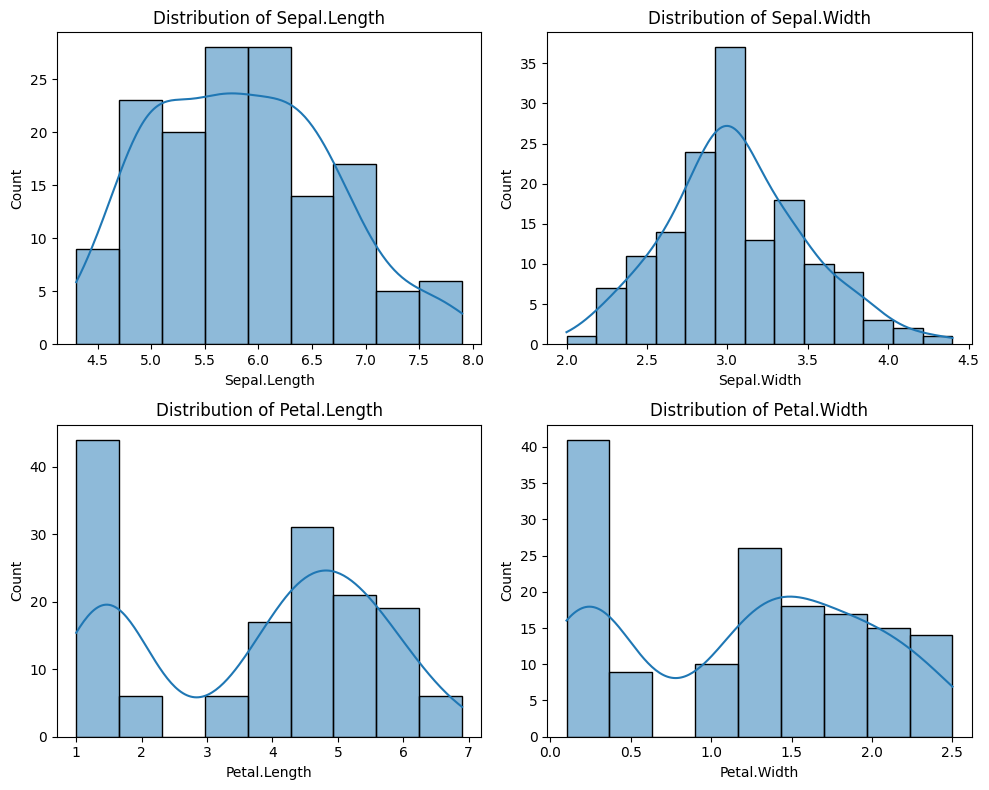

In [101]:
plt.figure(figsize=(10, 8))
for i, var in enumerate(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[var].dropna(), kde=True, palette='kind')
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

#### Data split
타겟과 피처 분리

In [102]:
y= dataset['Species']
X= dataset.drop(columns=['Species'])

print(X.shape)              # X의 차원
print('---------------------')
print(y.shape)              # y의 차원
print('---------------------')
print(X)                    
print('---------------------')
print(y)

(150, 4)
---------------------
(150,)
---------------------
     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
---------------------
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32


트레인 셋/ 테스트 셋 분리

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.4,              # 테스트 셋: 40 % => 트레인 셋 : 60%
                                                    random_state=42)            # 시드: 42

In [104]:
print("train 셋")
print(X_train.shape)
print(y_train.shape)
print(150*0.6)
print('---------------------')
print("test 셋")
print(X_test.shape)
print(y_test.shape)
print(150*0.4)

train 셋
(90, 4)
(90,)
90.0
---------------------
test 셋
(60, 4)
(60,)
60.0


svm은 거리기반 분류 모델이기 때문에  
피처변수에 대해 스케일링 진행

In [105]:
ss = StandardScaler() # 정의

In [106]:
ss.fit(X_train)

# 스케일러를 통한 표준화
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

### 모델링

#### 1. 피처 변수 모두 활용

In [107]:
model_svm = svm.SVC(kernel='linear', C=1) # 기본 모델

In [108]:
model_svm.fit(X_train_ss,y_train)                      # 훈련 데이터를 svm 분류기를 훈련

predictions = model_svm.predict(X_test_ss)             # 훈련된 모델을 사용하여 테스트 데이터에서 예측
score=metrics.accuracy_score(y_test,predictions)
print("기본 선형 모델에서의 정확도: {0:0.3f}".format(score))

기본 선형 모델에서의 정확도: 0.967


최적의 변수를 찾기 위해 grid search를 해보려함.

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],    # 커널
    'C' : np.arange(0.1,101,0.01),                      # C값
    'gamma' : ['scale', 'auto'],                        # linear 커널에서는 자동으로 빠짐
    'degree': [2, 3, 4],                                # poly 커널에서만 작동함.
    'coef0': [0.0, 0.1, 0.5]                            # poly와 시그모이드에서만 작동
}

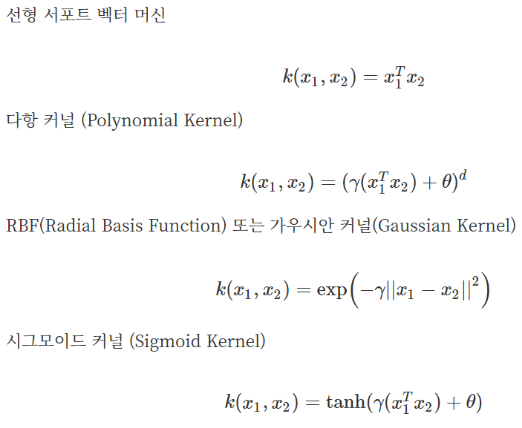

In [111]:
# 이미지 삽입을 위한 
from IPython.display import Image, display


img_path = '수식.png'      # 이미지 파일 경로
display(Image(filename=img_path))      # 삽입

In [112]:
# 그리드 서치 시작
grid_search = GridSearchCV(estimator=model_svm,             # svm 모델 기반
                           param_grid=param_grid,           # 위에서 설정한 범위
                           cv=5,                            # k-fold = 5
                           scoring='accuracy')              # 최적의 파라미터 선택 기준 : accuracy

In [113]:
grid_search.fit(X_train_ss,y_train)    # 그리드 서치 시작
print(f'최적의 파라미터 {grid_search.best_params_}')

최적의 파라미터 {'C': 4.709999999999997, 'coef0': 0.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


선형 커널, C= 4.710일 때 정확도가 최대로  
이 데이터셋에서의 최적 파라미터로 보임.

In [114]:
svm_best = SVC(kernel = 'linear', C = 4.709999999999997)          # 최적의 모델 => 선형 svm, C= 4.710
# svm_best = grid_search.best_estimator_

svm_best.fit(X_train_ss, y_train)

y_pred_train = svm_best.predict(X_train_ss)                          # train
accuracy_best = metrics.accuracy_score(y_train, y_pred_train)

y_pred_best = svm_best.predict(X_test_ss)                            # test
accuracy_best = metrics.accuracy_score(y_test, y_pred_best)

##### 평가

In [115]:
# 평가 지표
print("트레인셋에서의 accuracy : ", accuracy_score(y_train, y_pred_train))
print("classification_report : ", classification_report(y_train, y_pred_train))

print("테스트셋에서의 accuracy : ", accuracy_score(y_test, y_pred_best))
print("classification_report : ", classification_report(y_test, y_pred_best))

트레인셋에서의 accuracy :  0.9555555555555556
classification_report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      0.87      0.93        31
           2       0.89      1.00      0.94        32

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90

테스트셋에서의 accuracy :  0.9833333333333333
classification_report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.95      0.97        19
           2       0.95      1.00      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



##### 혼동행렬

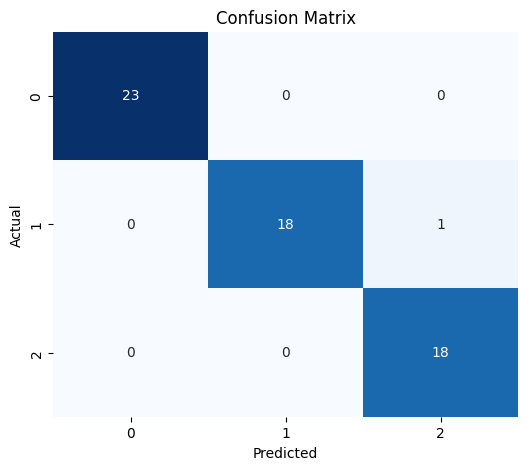

In [116]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix 계산
cm = confusion_matrix(y_test, y_pred_best)

# 히트맵으로 시각화
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##### 변수의 결정 경계에 한 영향력

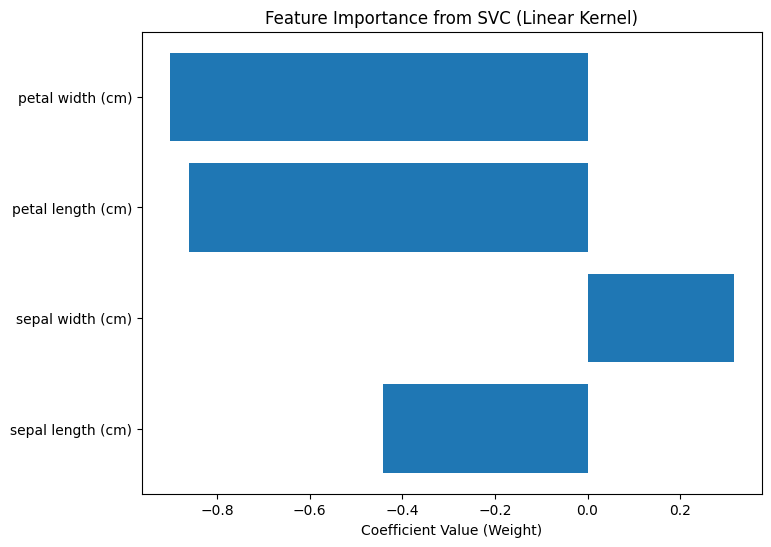

In [117]:
# 가중치 벡터 추출 (coef_)
feature_weights = svm_best.coef_

# 피처 이름 정의
feature_names = ['sepal length (cm)', 'sepal width (cm)','petal length (cm)', 'petal width (cm)']

# 가중치 시각화
plt.figure(figsize=(8,6))
plt.barh(feature_names, feature_weights[0])
plt.title('Feature Importance from SVC (Linear Kernel)')
plt.xlabel('Coefficient Value (Weight)')
plt.show()

##### 시각화

In [118]:
# 결정경계 시각화를 위한 함수 정의: Sepal
def plot_decision_boundary_sepal(x, y, model):
    h = 0.02  # 결정경계의 해상도
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1     # x축 범위
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1     # y축 범위
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))   # 2차원 공간의 좌표 생성 => 결정경계
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) # 다시 ravel()을 통해 1차원배열로 펼쳐서 predict에 활용
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)                                                      
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

# 결정경계 시각화를 위한 함수 정의: Petal
def plot_decision_boundary_petal(x, y, model):
    h = 0.02  # 결정경계의 해상도
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))   
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)                                                      
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')

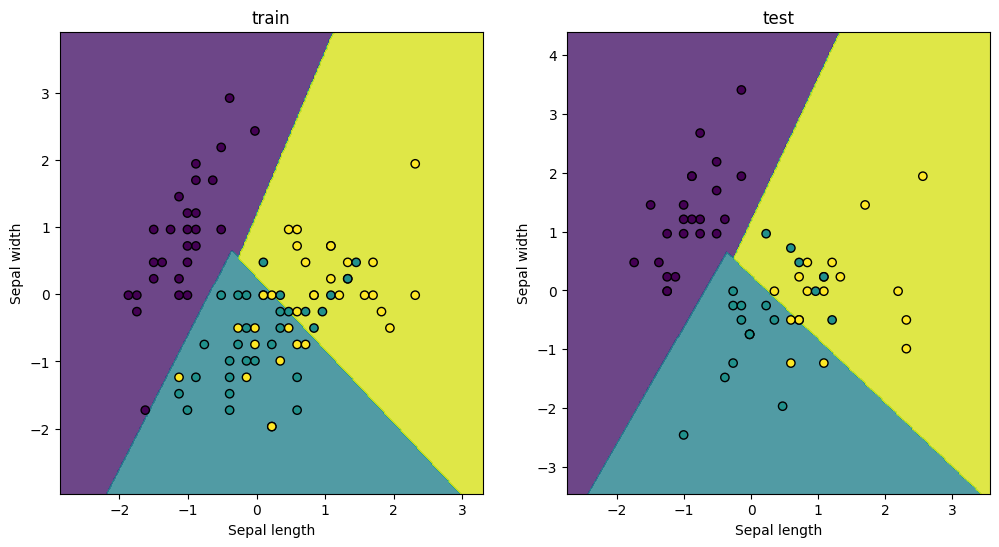

In [119]:
# Sepal 관련 변수들만 추려 2차원으로 시각화함

X_train_2d = X_train_ss[:, :2]  # 첫 두 개의 특성 선택
X_test_2d = X_test_ss[:, :2]    # 첫 두 개의 특성 선택

# 모델 학습 (두 개의특성만 사용)
svm_best_linear_2d = SVC(kernel='linear', C = 4.709999999999997)  # 기존과 동일한 모델 구조
svm_best_linear_2d.fit(X_train_2d, y_train)

# 결정경계 시각화
plt.figure(figsize=(12, 6))

# 트레인 데이터셋
plt.subplot(1, 2, 1)
plot_decision_boundary_sepal(X_train_2d, y_train, svm_best_linear_2d)
plt.title("train")

# 테스트 데이터셋
plt.subplot(1, 2, 2)
plot_decision_boundary_sepal(X_test_2d, y_test, svm_best_linear_2d)
plt.title("test")

plt.show()


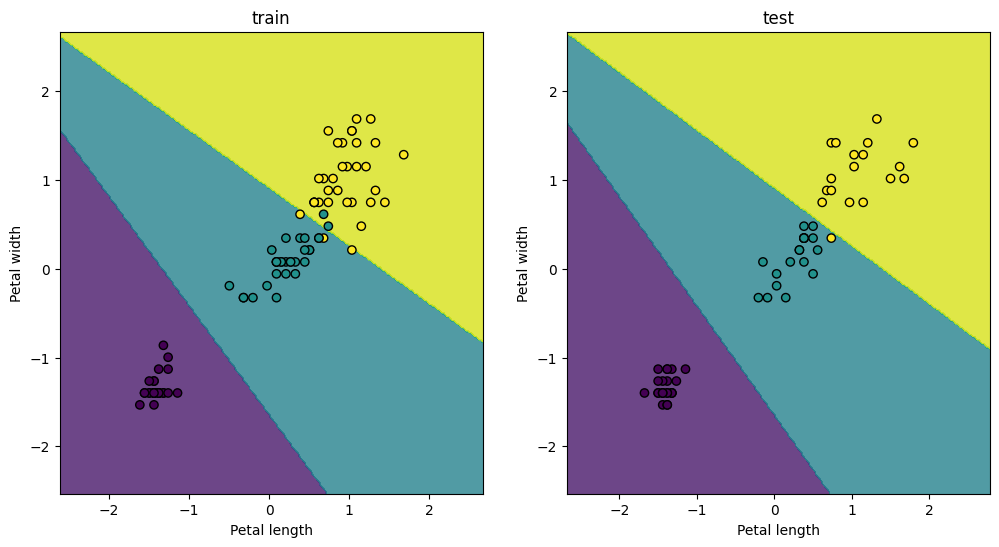

In [120]:
# Petal 변수만 추려서 사용

X_train_2d = X_train_ss[:, 2:]  # 뒷 두 개의 특성 선택
X_test_2d = X_test_ss[:, 2:]    # 뒷 두 개의 특성 선택

# 모델 학습 (두 개의특성만 사용)
svm_best_linear_2d = SVC(kernel='linear', C = 4.709999999999997)  # 기존과 동일한 모델 구조
svm_best_linear_2d.fit(X_train_2d, y_train)

# 결정경계 시각화
plt.figure(figsize=(12, 6))

# 트레인 데이터셋
plt.subplot(1, 2, 1)
plot_decision_boundary_petal(X_train_2d, y_train, svm_best_linear_2d)
plt.title("train")

# 테스트 데이터셋
plt.subplot(1, 2, 2)
plot_decision_boundary_petal(X_test_2d, y_test, svm_best_linear_2d)
plt.title("test")

plt.show()


변수를 모두 사용했을 때는 0.983의 정확도가 나옴  
일부 정확하게 분류 되지 않음

#### 2. 피처 셀렉션 => petal 관련 변수만 활용
- feature selection한 결과물을 시각화하여 보았을 때 petal을 기반으로 잘 분류되었음을 알 수 있다.

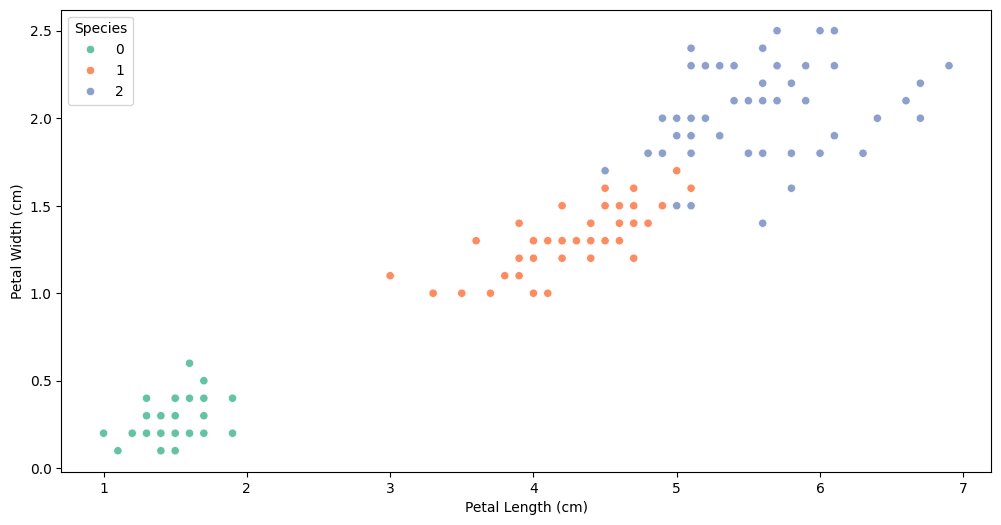

In [121]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=dataset.iloc[:, 2], y=dataset.iloc[:, 3], hue=dataset['Species'], palette='Set2')  # 산점도
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

- 피처가 2차원이므로 시각화  
위 사항에서는 데이터가 선형성을 보이고 있는 것으로 보임.  
=> 따라서 linear 커널을 사용하려고 함.

In [122]:
X2_train_ss = X_train.iloc[:,2:]
y2_train = y_train

X2_test_ss = X_test.iloc[:,2:]
y2_test = y_test

In [123]:
print("새로운 트레인 데이터")
print(X2_train_ss.shape)
print(y2_train.shape)
print('--------------------------')
print("새로운 테스트 데이터")
print(X2_train_ss.shape)
print(y2_train.shape)

새로운 트레인 데이터
(90, 2)
(90,)
--------------------------
새로운 테스트 데이터
(90, 2)
(90,)


In [124]:
# 초기화
model_svm = svm.SVC(kernel='linear', C=1) # 기본 선형 모델

In [125]:
model_svm.fit(X2_train_ss,y2_train)

predictions_train = model_svm.predict(X2_train_ss)             # 훈련된 모델을 사용하여 트레인 데이터에서 예측
score1=metrics.accuracy_score(y2_train,predictions_train)
print("정확도: {0:0.3f}".format(score1))

predictions_test = model_svm.predict(X2_test_ss)             # 훈련된 모델을 사용하여 테스트 데이터에서 예측
score2=metrics.accuracy_score(y_test,predictions_test)
print("정확도: {0:0.3f}".format(score2))

정확도: 0.944
정확도: 1.000


오히려 train에서보다 test에서 더 높은 성능을 보여주는 상황  
=> 데이터가 150개 정도밖에 안 되는 적은 경우라 그런 거 같음.

##### 평가

In [126]:
# 평가 지표
print("Accuracy : ", accuracy_score(y2_test, predictions))
print("classification_report : ", classification_report(y2_test, predictions))

Accuracy :  0.9666666666666667
classification_report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.95      0.95      0.95        19
           2       0.94      0.94      0.94        18

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



최대한 C값이 낮은 svm을 그리기 위해  
C 값에 대해 그리드 서치하려함.

In [127]:
param_grid = {
    'kernel' : ['linear'],                              # 커널
    'C' : np.arange(0.1,1,0.01),                        # C값
}

In [128]:
# 그리드 서치 시작
grid_search = GridSearchCV(estimator=model_svm,             # svm 모델 기반
                           param_grid=param_grid,           # 위에서 설정한 범위
                           cv=5,                            # k-fold = 5
                           scoring='accuracy')              # 최적의 파라미터 선택 기준 : accuracy

In [129]:
grid_search.fit(X2_train_ss,y2_train)    # 그리드 서치 시작
print(f'최적의 파라미터 {grid_search.best_params_}')

최적의 파라미터 {'C': 0.24999999999999992, 'kernel': 'linear'}


선형 커널, C= 0.250일 때 정확도가 최대로  
이 데이터셋에서의 최적 파라미터로 보임.

In [130]:
svm_best = SVC(kernel = 'linear', C = 0.24999999999999992)          # 최적의 모델 => 선형 svm, C= 0.250
# svm_best = grid_search.best_estimator_

svm_best.fit(X2_train_ss, y2_train)
y_pred_best = svm_best.predict(X2_test_ss)
accuracy_best = metrics.accuracy_score(y2_test, y_pred_best)

In [131]:
# 평가 지표
print("최적의 모델에서의 Accuracy : ", accuracy_score(y2_test, y_pred_best))
print("classification_report : ", classification_report(y2_test, y_pred_best))

최적의 모델에서의 Accuracy :  1.0
classification_report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



##### 혼동행렬

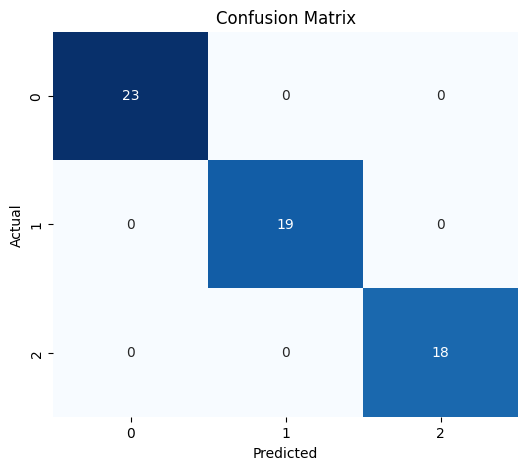

In [132]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix 계산
cm = confusion_matrix(y2_test, y_pred_best)

# 히트맵으로 시각화
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##### 변수의 결정 경계에 한 영향력

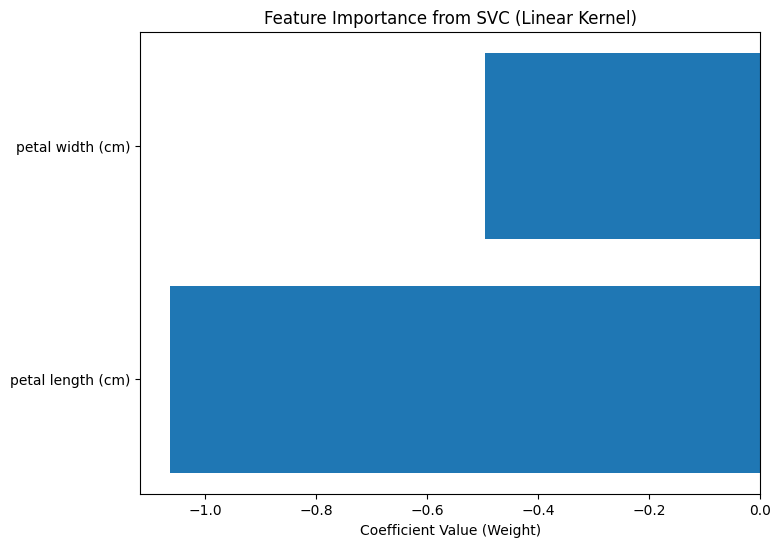

In [133]:
# 가중치 벡터 추출 (coef_)
feature_weights = svm_best.coef_

# 피처 이름 정의
feature_names = ['petal length (cm)', 'petal width (cm)']

# 가중치 시각화
plt.figure(figsize=(8,6))
plt.barh(feature_names, feature_weights[0])
plt.title('Feature Importance from SVC (Linear Kernel)')
plt.xlabel('Coefficient Value (Weight)')
plt.show()

##### 시각화

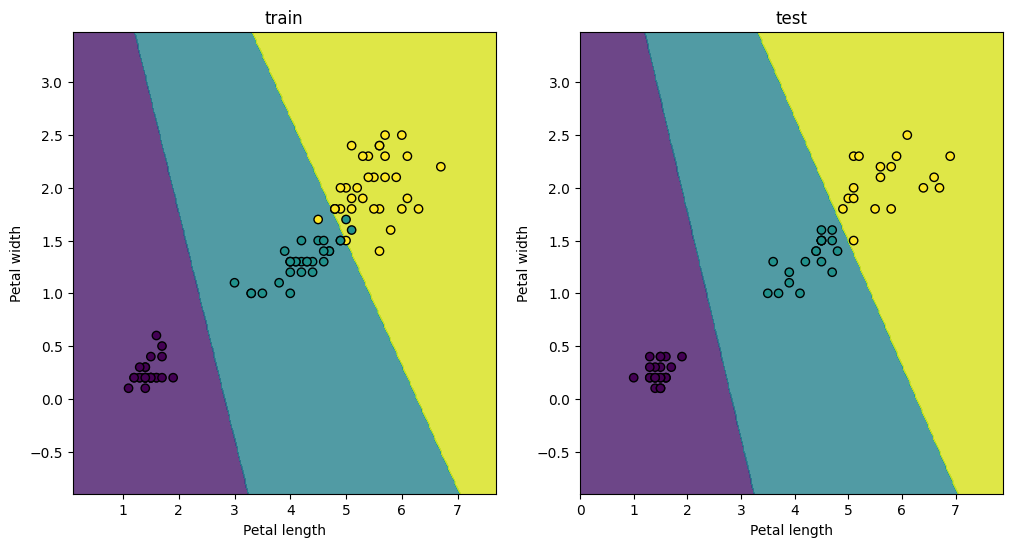

In [134]:
X_train_2d = np.array(X2_train_ss)  # 첫 두 개의 특성 선택
X_test_2d = np.array(X2_test_ss)   # 첫 두 개의 특성 선택

# 모델 학습 (두 개의특성만 사용)
svm_best_linear_2d = SVC(kernel='linear', C = 0.24999999999999992)  # 기존과 동일한 모델 구조
svm_best_linear_2d.fit(X_train_2d, y2_train)

# 결정경계 시각화
plt.figure(figsize=(12, 6))

# 트레인 데이터셋
plt.subplot(1, 2, 1)
plot_decision_boundary_petal(X_train_2d, y2_train, svm_best_linear_2d)
plt.title("train")

# 테스트 데이터셋
plt.subplot(1, 2, 2)
plot_decision_boundary_petal(X_test_2d, y2_test, svm_best_linear_2d)
plt.title("test")

plt.show()


아이리스 데이터에 대해 분류 모델을 돌린다면  
피처 셀렉을 통해 'petal'과 관련한 변수만 사용하는 것이 좋아보입니다.

위 상황에서는 데이터 개수가 적기 때문에 분리가 운이 좋게 잘 분리되어  
성능이 높았던 것으로 생각됩니다.